# Prueba Python

### Desarrolle la prueba en un cuaderno de jupyter o colab, tenga en cuenta el tiempo dado para esta y sea lo más claro y simple que pueda, recuerde que a veces más es menos

## Contexto

Dentro de la tabla en formato Json usted encontrará información sobre el comportamiento de creditos desembolsados a un grupo de clientes:

1. *ID_Credit:* Identificador de crédito
2. *LoanDate:* Fecha de desembolso
3. *B_M:* Flag Indicativo si el crédito es incumplido "1" o no "0"
4. *City:* Ciudad de solicitud del crédito
5. *age:* Edad del solicitante
6. *Time_experience:* Años de experiencia en la actividad del solicitante
7. *Activity:* Actividad del solicitante
8. *BankingExp:* Flag indicativo de si el cliente tiene "S" o no "N" experiencia financiera
9. *OtherIncome:* Flag indicativo si el cliente tiene ingresos adicionales "S" o no "N"
10. *SectBalance:* Saldo vigente con el sector financiero
11. *Exp:* Valor de los gastos mensuales del cliente
12. *Income:* Valor de los ingresos mensuales del cliente
13. *Delincuency_Hist:* Cantidad de moras históricas del cliente
14. *totmou*: Total de minutos usados por el cliente

Con la información suministrada, y teniendo en cuenta que el objetivo es generar una clasificación entre los clientes cumplidos e incumplidos, debe:


In [25]:
import pandas as pd
import json
            
with open('BD_Credito.json') as f:  
      data = json.load(f)


In [26]:
data = pd.read_excel('BD_Credito (1).xlsx')
data.head()

,ID_Credit,Customer_ID,LoanDate,B_M,City,age,Time_experience,Activity,BankingExp,OtherIncome,SectBalance,Exp,Income,Delincuency_Hist
0,1,1082423,2016-11-25,1,ATLANTHIC SOUTH,32,20,Empleado,N,S,8000,590.0,1250.0,1
1,2,1069232,2020-05-28,1,ATLANTHIC SOUTH,29,20,Pensionado,S,S,7500,733.0,1500.0,0
2,3,1031705,2016-06-25,1,ATLANTHIC SOUTH,67,20,Empleado,S,S,5000,300.0,1000.0,3
3,4,1089806,2018-06-09,0,NEW ENGALND,30,20,Empleado,S,S,2200,500.0,1600.0,2
4,5,1076695,2018-01-06,1,NEW ENGALND,62,30.33333333,Empleado,S,S,7500,500.0,1926.0,0


## Parte 1

Perfile los clientes, a partir de este perfilamiento, identifique las principales diferencias entre los tipos de clientes. Suministre los análisis, resultados y demás elementos que considere pertinentes.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Para el perfilamiento del los clientes se tendran encuenta 5 varialbes que se conisderan las mas importantes y son *B_M*,   *BankingExp* , *Activity* , *Delincuency_Hist* , *SectBalance* ya que pueden ser las que esten dando mayor información sobre la perfilación con respecto a cada ciudad.

In [45]:
data_1=data[["City",'B_M','BankingExp',"Delincuency_Hist","Activity","SectBalance"]]

In [47]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   City              5197 non-null   object
 1   B_M               5197 non-null   int64 
 2   BankingExp        5197 non-null   object
 3   Delincuency_Hist  5197 non-null   int64 
 4   Activity          5197 non-null   object
 5   SectBalance       5197 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 243.7+ KB


In [192]:
data.corr()

,ID_Credit,Customer_ID,B_M,SectBalance,Exp,Income,Delincuency_Hist
ID_Credit,1.000000,-0.014481,0.011567,-0.018807,-0.013957,-0.012982,0.006688
Customer_ID,-0.014481,1.000000,-0.007133,0.001808,0.019823,0.010620,-0.004964
B_M,0.011567,-0.007133,1.000000,0.016763,-0.015575,0.000903,-0.017245
SectBalance,-0.018807,0.001808,0.016763,1.000000,0.075346,0.198274,-0.011456
Exp,-0.013957,0.019823,-0.015575,0.075346,1.000000,0.318911,0.002081
Income,-0.012982,0.010620,0.000903,0.198274,0.318911,1.000000,0.019080
Delincuency_Hist,0.006688,-0.004964,-0.017245,-0.011456,0.002081,0.019080,1.000000


In [205]:
data['Activity'].value_counts().to_frame()

,Activity
Pensionado,1765
Empleado,1718
independiente,1714


In [206]:
data['BankingExp'].value_counts().to_frame()

,BankingExp
S,3787
N,1410


In [207]:
data['B_M'].value_counts().to_frame()

,B_M
0,2627
1,2570


In [215]:
df_gptest = data_1
grouped_test1 = df_gptest.groupby(['B_M',"Delincuency_Hist"],as_index=False).mean()
grouped_test1

,B_M,Delincuency_Hist,SectBalance
0,0,0,7889.941385
1,0,1,7924.840000
2,0,2,7795.363636
3,0,3,7767.657682
4,0,4,7833.160714
5,1,0,8066.980304
6,1,1,7736.251412
7,1,2,8317.176179
8,1,3,7809.069149
9,1,4,7869.981250


In [216]:
grouped_pivot = grouped_test1.pivot(index='B_M',columns='Delincuency_Hist')
grouped_pivot

SectBalance                                         \
Delincuency_Hist            0            1            2            3   
B_M                                                                    
0                 7889.941385  7924.840000  7795.363636  7767.657682   
1                 8066.980304  7736.251412  8317.176179  7809.069149   

                               
Delincuency_Hist            4  
B_M                            
0                 7833.160714  
1                 7869.981250

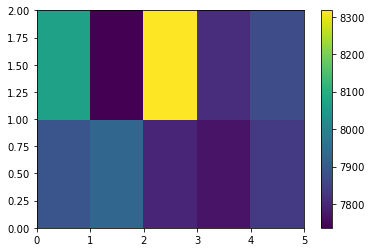

In [219]:
plt.pcolor(grouped_pivot)
plt.colorbar()
plt.show()

In [72]:
import seaborn as sb

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


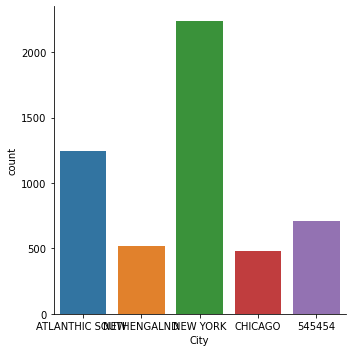

In [75]:
sb.factorplot('City',data=data_1,kind="count")

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


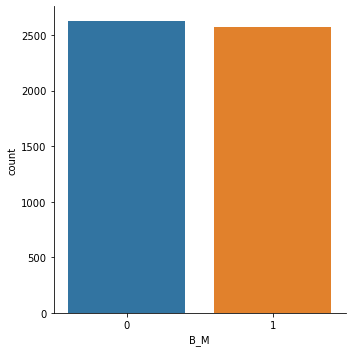

In [74]:
sb.factorplot('B_M',data=data_1,kind="count")

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


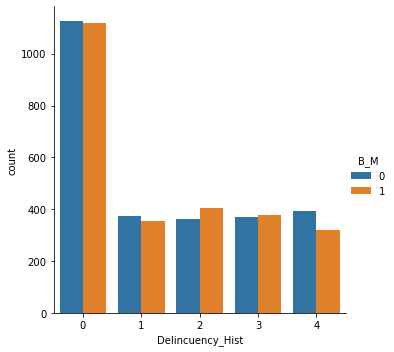

In [76]:
### Comportamiento de  si el crédito es incumplido por la cantidad de mora 
sb.factorplot('Delincuency_Hist',data=data_1,hue='B_M',kind="count")

In [222]:
### Coeficientes 

from scipy import stats
pearson_coef, p_value = stats.pearsonr(data['Delincuency_Hist'], data['Exp'])
print("El coeficiente de correlación Pearson es", pearson_coef, " con un valor P de P =", p_value) 

El coeficiente de correlación Pearson is 0.002080543908788235  con un valor P de P = 0.8808033109524105


In [225]:
grouped_test2=data[['Activity', 'Exp']].groupby(['Activity'])
grouped_test2.head(2)
df_gptest.head()
grouped_test2.get_group('Empleado')['Exp']

0       590.0
2       300.0
3       500.0
4       500.0
9       440.0
        ...  
5185    290.0
5186    300.0
5188    400.0
5191    350.0
5195    400.0
Name: Exp, Length: 1718, dtype: float64

In [229]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Pensionado')['Exp'], grouped_test2.get_group('independiente')['Exp'], grouped_test2.get_group('Empleado')['Exp'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val) 

Resultados ANOVA: F= 0.46635969082142226 , P = 0.6273078799554235


### Ciudad 

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Us

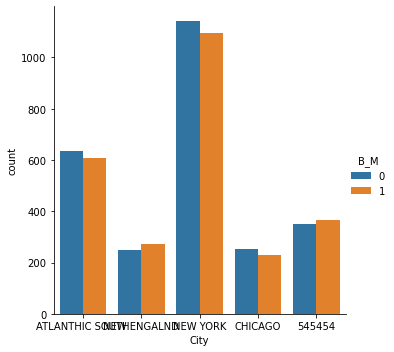

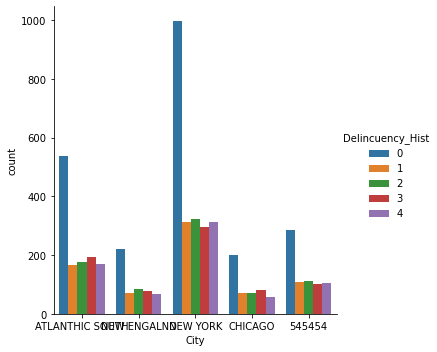

In [191]:
### Comportamiento de  si el crédito es incumplido por ciudad 
sb.factorplot('City',data=data_1,hue='B_M',kind="count")
### comportamiento por el nivel de mora 
sb.factorplot('City',data=data_1,hue='Delincuency_Hist',kind="count")

## Parte 2

Proponga por lo menos tres modelos o alternativas que permitan generar la clasificación de los clientes cumplidos e incumplidos, realice interpretaciones de los modelos mostrando los resultados que considere necesarios y su respectivo análisis. Finalmente compare el ajuste y la efectividad de los modelos.

In [146]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
### Metodo de cladificacion 1

In [127]:
## ruido gausiano
def f(x):
    y = 0.1*np.square(x) + 0.2*np.random.randn(x.size)
    return y
x = data.Income
y = f(x) 
tree = DecisionTreeRegressor(max_depth=5, random_state=42) 
tree.fit(x.values.reshape(-1,1), y)
x2 = data.Exp.values.reshape(-1,1)
print( tree.predict(x2))

[205854.46245645 205854.46245645 205854.46245645 ... 205854.46245645
 205854.46245645 205854.46245645]


In [ ]:
### Metodo de clasificacio 2

In [136]:
n = data.Exp.count()
n

5197

In [141]:
c = data[data['B_M'] != 1]
ca=c.B_M.count()
ca

2627

In [147]:
niter = 2000
with pm.Model() as modelo:
    # a priori
    p = pm.Beta('p', alpha=2, beta=2)
    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=ca)

In [151]:
with modelo:
    trace = pm.sample(niter, cores=5)

C:\Users\kevin\AppData\Local\Temp/ipykernel_14988/1740282551.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(niter, cores=5)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [p]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 49 seconds.


In [154]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\kevin\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.506,0.007,0.493,0.519,0.0,0.0,3986.0,6601.0,1.0


In [157]:
### Metodo de cladificacion 3

In [158]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [200]:

X = data.Exp.values.reshape(-1, 1)
y = data.OtherIncome

In [201]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, 
                                                    random_state=0)


In [202]:
# inicializar el clasificador Naive Bayes
bayes_ingenuo = GaussianNB()

# predicción 
y_pred = bayes_ingenuo.fit(X_train, y_train).predict(X_test)

In [188]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_test != y_pred).sum()/y_test.shape[0]))

Cantidad de errores de clasificación sobre un total de 3638 casos: 926
Efectividad del algoritmo:  0.75


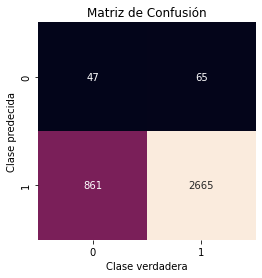

In [189]:
sb.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

## Parte 3
Realice un análisis del incumplimiento crediticio de los clientes y postule las principales conclusiones.

la principal conclusión con la segun el metodo numero 2 es que se puede tener un ingreso de una persona se puede tener una probabilidad de 0.52 de que sea inucumplido a la hora de realizar el pago correspondiente a tiempo, se muestra además que la correlación más alta vendría a ser SectBalance con Income  lo cual muestra que estas variables puede ser como codependientes con respecto a  realizar un modelo de regresión, además como se evidencio en el método 3 de bayes se indica que se tiene una efectividad del 75% para esta 2 variables mostrando que para no tener una correlación tan alta es bastante significativa dicha efectividad y los casos descartado fueron pocos esto en términos estadísticos ademas de esto se realizo una pequeña anova para mirar el comportamiento de la actividad de la persona con los ingresos y este tuvo un p valor bastante grande.

